#Data Understanding

Dataset yang digunakan adalah Movie Recommendation Dataset yang didapat dari situs kaggle. Link dataset dapat dilihat dari tautan berikut [Movie Recommendation Dataset](https://www.kaggle.com/datasets/abhayayare/movie-recommendation-dataset)

**Download dataset and unzip**

In [ ]:
!kaggle datasets download -d abhayayare/movie-recommendation-dataset

Dataset URL: https://www.kaggle.com/datasets/abhayayare/movie-recommendation-dataset
License(s): CC0-1.0
  0% 0.00/4.22k [00:00<?, ?B/s]
100% 4.22k/4.22k [00:00<00:00, 8.26MB/s]


In [ ]:
!unzip /content/movie-recommendation-dataset.zip

Archive:  /content/movie-recommendation-dataset.zip
  inflating: movie recommendation system/movies.csv  
  inflating: movie recommendation system/ratings.csv  
  inflating: movie recommendation system/users.csv  


**Baca informasi yang terkandung pada dataset**

In [ ]:
import pandas as pd

movie = pd.read_csv('/content/movie recommendation system/movies.csv')
rating = pd.read_csv('/content/movie recommendation system/ratings.csv')
user = pd.read_csv('/content/movie recommendation system/users.csv')

print("jumlah data movie : ", len(movie.movie_id.unique()))
print("jumlah data rating user: ", len(rating.user_id.unique()))
print("jumlah data rating movie: ", len(rating.movie_id.unique()))
print("jumlah data user : ", len(user.user_id.unique()))

jumlah data movie :  100
jumlah data rating user:  50
jumlah data rating movie:  99
jumlah data user :  50


Variabel-variabel terkandung:
*   user : merupakan daftar user movie.
*   movies : merupakan daftar movie.
*   ratings : merupakan daftar rating movie.

**Eksplorasi Movie**

In [ ]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie_id      100 non-null    int64 
 1   title         100 non-null    object
 2   genre         100 non-null    object
 3   release_year  100 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.2+ KB


In [ ]:
movie.describe()

,movie_id,release_year
count,100.000000,100.000000
mean,50.500000,2002.550000
std,29.011492,12.420556
min,1.000000,1980.000000
25%,25.750000,1992.750000
50%,50.500000,2002.000000
75%,75.250000,2014.000000
max,100.000000,2024.000000


In [ ]:
movie.head()

,movie_id,title,genre,release_year
0,1,Rest.,Horror,1986
1,2,Sport admit.,Sci-Fi,1987
2,3,Term reality.,Horror,1981
3,4,Government your only.,Thriller,2020
4,5,Her pretty north.,Mystery,1983


In [ ]:
movie.duplicated().sum()

0

Movie mengandung 100 baris dan 4 kolom\
movie_id (1 - 100)\
release_year (1980 - 2024)\
Tanpa missing value\
Tanpa duplikasi data

**Eksplorasi Rating**

In [ ]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   user_id   500 non-null    int64
 1   movie_id  500 non-null    int64
 2   rating    500 non-null    int64
dtypes: int64(3)
memory usage: 11.8 KB


In [ ]:
rating.describe()

,user_id,movie_id,rating
count,500.000000,500.000000,500.000000
mean,26.498000,51.582000,3.000000
std,14.346485,28.103218,1.429716
min,1.000000,1.000000,1.000000
25%,15.000000,29.000000,2.000000
50%,27.000000,51.000000,3.000000
75%,39.000000,76.000000,4.000000
max,50.000000,100.000000,5.000000


In [ ]:
rating.head()

,user_id,movie_id,rating
0,18,76,3
1,6,92,1
2,7,53,5
3,6,86,1
4,34,30,1


In [ ]:
rating.duplicated().sum()

4

Rating mengandung 500 baris dan 3 kolom\
user_id (1 - 50)\
movie_id (1 - 100)\
rating (1 - 5)\
Tanpa missing value\
4 duplikasi data

**Eksplorasi User**

In [ ]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  50 non-null     int64 
 1   name     50 non-null     object
dtypes: int64(1), object(1)
memory usage: 928.0+ bytes


In [ ]:
user.describe()

,user_id
count,50.00000
mean,25.50000
std,14.57738
min,1.00000
25%,13.25000
50%,25.50000
75%,37.75000
max,50.00000


In [ ]:
user.head()

,user_id,name
0,1,Rebecca Lloyd
1,2,Brian Campbell
2,3,Sandra Watts
3,4,Christopher Simpson
4,5,Rodney Martin


In [ ]:
user.duplicated().sum()

0

User mengandung 100 baris dan 4 kolom\
user_id (1 - 50)\
Tanpa missing value\
Tanpa duplikasi data

**Menggabungkan Movie, Rating, dan User**

In [ ]:
movie_info = pd.concat([movie, rating, user])
movie = pd.merge(rating, movie_info, on='movie_id', how='left')
movie

,user_id_x,movie_id,rating_x,title,genre,release_year,user_id_y,rating_y,name
0,18,76,3,Billion there her.,Thriller,2015.0,NaN,NaN,NaN
1,18,76,3,NaN,NaN,NaN,18.0,3.0,NaN
2,18,76,3,NaN,NaN,NaN,21.0,2.0,NaN
3,18,76,3,NaN,NaN,NaN,26.0,5.0,NaN
4,18,76,3,NaN,NaN,NaN,15.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...
3411,37,28,2,NaN,NaN,NaN,29.0,4.0,NaN
3412,37,28,2,NaN,NaN,NaN,5.0,2.0,NaN
3413,37,28,2,NaN,NaN,NaN,30.0,4.0,NaN
3414,37,28,2,NaN,NaN,NaN,29.0,5.0,NaN


**Cek Missing Value**

In [ ]:
movie.isna().sum()

,0
user_id_x,0
movie_id,0
rating_x,0
title,2916
genre,2916
release_year,2916
user_id_y,500
rating_y,500
name,3416


**Group Movie by movie_id**

In [ ]:
movie.groupby('movie_id').sum()

,user_id_x,rating_x,title,genre,release_year,user_id_y,rating_y,name
movie_id,,,,,,,,
1,525,55,Rest.Rest.Rest.Rest.,HorrorHorrorHorrorHorror,7944.0,420.0,44.0,0
2,48,10,Sport admit.,Sci-Fi,1987.0,24.0,5.0,0
3,465,45,Term reality.Term reality.Term reality.Term re...,HorrorHorrorHorrorHorror,7924.0,372.0,36.0,0
4,1414,133,Government your only.Government your only.Gove...,ThrillerThrillerThrillerThrillerThrillerThriller,12120.0,1212.0,114.0,0
5,942,72,Her pretty north.Her pretty north.Her pretty n...,MysteryMysteryMysteryMysteryMystery,9915.0,785.0,60.0,0
...,...,...,...,...,...,...,...,...
96,980,161,Old fall on.Old fall on.Old fall on.Old fall o...,DramaDramaDramaDramaDramaDrama,11994.0,840.0,138.0,0
97,138,21,Range huge of.Range huge of.,RomanceRomance,4016.0,92.0,14.0,0
98,174,6,Suggest point nearly.Suggest point nearly.,FantasyFantasy,3992.0,116.0,4.0,0


#Data Preparation

**Deklarasi All Movie Rate**

In [ ]:
all_movie_rate = rating
all_movie_rate

,user_id,movie_id,rating
0,18,76,3
1,6,92,1
2,7,53,5
3,6,86,1
4,34,30,1
...,...,...,...
495,49,46,1
496,49,74,3
497,23,96,4
498,27,72,1


**Menggabungkan All Movie Rate dengan movie(movie_id, title, genre) berdasarkan movie_id**

In [ ]:
all_movie = pd.merge(all_movie_rate, movie[['movie_id', 'title', 'genre']], on='movie_id', how='left')
all_movie

,user_id,movie_id,rating,title,genre
0,18,76,3,Billion there her.,Thriller
1,18,76,3,NaN,NaN
2,18,76,3,NaN,NaN
3,18,76,3,NaN,NaN
4,18,76,3,NaN,NaN
...,...,...,...,...,...
21699,37,28,2,NaN,NaN
21700,37,28,2,NaN,NaN
21701,37,28,2,NaN,NaN
21702,37,28,2,NaN,NaN


**Cek Missing Value**

In [ ]:
all_movie.isna().sum()

,0
user_id,0
movie_id,0
rating,0
title,18788
genre,18788


**Clean Missing Value**

In [ ]:
clean = all_movie.dropna()
clean.isna().sum()

,0
user_id,0
movie_id,0
rating,0
title,0
genre,0


**Deklarasi Fix dengan Clean Data yang diurutkan**

In [ ]:
fix = clean.sort_values(by=['movie_id'])
fix

,user_id,movie_id,rating,title,genre
3698,4,1,3,Rest.,Horror
13533,48,1,2,Rest.,Horror
13528,48,1,2,Rest.,Horror
3703,4,1,3,Rest.,Horror
1948,33,1,5,Rest.,Horror
...,...,...,...,...,...
9393,11,99,1,Thank sell.,Drama
9233,2,99,4,Thank sell.,Drama
4511,12,99,1,Thank sell.,Drama
9378,11,99,1,Thank sell.,Drama


**Deklarasi Preparation dengan data Fix**

In [ ]:
preparation = fix
preparation

,user_id,movie_id,rating,title,genre
3698,4,1,3,Rest.,Horror
13533,48,1,2,Rest.,Horror
13528,48,1,2,Rest.,Horror
3703,4,1,3,Rest.,Horror
1948,33,1,5,Rest.,Horror
...,...,...,...,...,...
9393,11,99,1,Thank sell.,Drama
9233,2,99,4,Thank sell.,Drama
4511,12,99,1,Thank sell.,Drama
9378,11,99,1,Thank sell.,Drama


**Hapus Duplikasi Data pada movie_id**

In [ ]:
preparation = preparation.drop_duplicates('movie_id')
preparation

,user_id,movie_id,rating,title,genre
3698,4,1,3,Rest.,Horror
1338,24,2,5,Sport admit.,Sci-Fi
12354,7,3,2,Term reality.,Horror
12057,35,4,3,Government your only.,Thriller
2464,23,5,3,Her pretty north.,Mystery
...,...,...,...,...,...
21618,23,96,4,Old fall on.,Drama
11958,24,97,5,Range huge of.,Romance
18805,34,98,1,Suggest point nearly.,Fantasy
8113,14,99,3,Thank sell.,Drama


**Konversi ke bentuk list**

In [ ]:
# Mengonversi data series ‘movie_id’ menjadi dalam bentuk list
movie_id = preparation['movie_id'].tolist()

# Mengonversi data series ‘title’ menjadi dalam bentuk list
movie_name = preparation['title'].tolist()

# Mengonversi data series ‘genre’ menjadi dalam bentuk list
movie_genre = preparation['genre'].tolist()

print(len(movie_id))
print(len(movie_name))
print(len(movie_genre))

99
99
99


**Buat Dictionary movie_new**

In [ ]:
# Membuat dictionary untuk data ‘movie_id’, ‘movie_name’, dan ‘movie_genre’
movie_new = pd.DataFrame({
    'id': movie_id,
    'movie_name': movie_name,
    'genre': movie_genre
})
movie_new

,id,movie_name,genre
0,1,Rest.,Horror
1,2,Sport admit.,Sci-Fi
2,3,Term reality.,Horror
3,4,Government your only.,Thriller
4,5,Her pretty north.,Mystery
...,...,...,...
94,96,Old fall on.,Drama
95,97,Range huge of.,Romance
96,98,Suggest point nearly.,Fantasy
97,99,Thank sell.,Drama


**Terapkan TfidfVectorizer**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data genre
tf.fit(movie_new['genre'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['action', 'comedy', 'drama', 'fantasy', 'fi', 'horror', 'mystery',
       'romance', 'sci', 'thriller'], dtype=object)

**Fit kedalam bentuk matriks**

In [ ]:
tfidf_matrix = tf.fit_transform(movie_new['genre'])
tfidf_matrix.shape

(99, 10)

**Hasilkan vektor tf-idf dalam bentuk matriks, menggunakan fungsi todense()**

In [ ]:
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , 0.        , 0.        ,
         1.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.70710678,
         0.        , 0.        , 0.        , 0.70710678, 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         1.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 1.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 1.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.70710678,
         0.        , 0.        , 0.        , 0.70710678, 0.        ],
        [0.        , 0.        , 1.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.    

**Buat DataFrame tfidf_matrix**

In [ ]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=movie_new.movie_name
).sample(10, axis=1).sample(10, axis=0)

,sci,drama,comedy,thriller,fantasy,horror,action,fi,mystery,romance
movie_name,,,,,,,,,,
Language financial.,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0
Customer political voice if.,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
Tonight short pressure.,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0
Audience little.,0.707107,0.0,0.0,0.0,0.0,0.0,0.0,0.707107,0.0,0.0
Institution foot.,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0
Local reality make.,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0
Recent growth officer.,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0
Key know.,0.707107,0.0,0.0,0.0,0.0,0.0,0.0,0.707107,0.0,0.0
Building throughout among.,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0


#Modelling

#**Model Development dengan Content Based Filtering**

**Hitung Cosine Similarity**

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.]])

**Buat DataFrame Cosine Similarity**

In [ ]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=movie_new['movie_name'], columns=movie_new['movie_name'])
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(5, axis=1).sample(10, axis=0)


Shape: (99, 99)


movie_name,Single wear news maybe.,Key know.,Wish.,Sport admit.,This.
movie_name,,,,,
Single wear news maybe.,1.0,0.0,0.0,0.0,0.0
Worker suffer.,0.0,1.0,0.0,1.0,0.0
Expect stuff become right.,0.0,0.0,0.0,0.0,0.0
Need water.,0.0,0.0,0.0,0.0,0.0
Card meet.,0.0,0.0,0.0,0.0,1.0
Range huge of.,0.0,0.0,0.0,0.0,0.0
Clearly skill himself each.,0.0,1.0,0.0,1.0,0.0
Own power.,1.0,0.0,0.0,0.0,0.0
Form respond mother.,0.0,0.0,0.0,0.0,0.0


**Buat Function movie_recommendations**

In [ ]:
def movie_recommendations(nama_movie, similarity_data=cosine_sim_df, items=movie_new[['movie_name', 'genre']], k=5):
    index = similarity_data.loc[:,nama_movie].to_numpy().argpartition(
        range(-1, -k, -1))

    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(nama_movie, errors='ignore')
    return pd.DataFrame(closest).merge(items).head(k)

**Menemukan rekomendasi movie yang mirip**

In [ ]:
movie_new[movie_new.movie_name.eq('Indicate happen.')]

,id,movie_name,genre
67,69,Indicate happen.,Romance


**Dapatkan rekomendasi movie yang mirip**

In [ ]:
movie_recommendations('Indicate happen.')

,movie_name,genre
0,Off service.,Romance
1,Such knowledge.,Romance
2,Oil office detail.,Romance
3,Blood trouble.,Romance
4,Degree information.,Romance


#**Collaborative Filtering**

**Import Library**

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

**Deklarasi df = rating**

In [ ]:
df = rating
df

,user_id,movie_id,rating
0,18,76,3
1,6,92,1
2,7,53,5
3,6,86,1
4,34,30,1
...,...,...,...
495,49,46,1
496,49,74,3
497,23,96,4
498,27,72,1


**Ubah data ke bentuk list, lakukan encoding, lakukan encoding angka**

In [ ]:
#Mengubah user_id menjadi list
user_ids = df["user_id"].unique().tolist()
print("list user_id : ", user_ids)

#Melakukan encoding user_id
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print("user_to_user_encoded : ", user_to_user_encoded)

#Melakukan proses encoding angka ke ke user_id
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print("user_encoded_to_user : ", user_encoded_to_user)

#Mengubah movie_id menjadi list
movie_ids = df["movie_id"].unique().tolist()
print("list movie_id : ", movie_ids)

#Melakukan encoding movie_id
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}
print("movie_to_movie_encoded : ", movie_to_movie_encoded)

#Melakukan proses encoding angka ke ke movie_id
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}
print("movie_encoded_to_movie : ", movie_encoded_to_movie)

list user_id :  [18, 6, 7, 34, 25, 38, 35, 31, 2, 37, 47, 27, 45, 4, 23, 30, 21, 36, 10, 24, 20, 8, 15, 46, 19, 33, 41, 22, 50, 28, 11, 44, 1, 26, 13, 29, 17, 39, 48, 3, 42, 12, 43, 14, 9, 16, 49, 32, 5, 40]
user_to_user_encoded :  {18: 0, 6: 1, 7: 2, 34: 3, 25: 4, 38: 5, 35: 6, 31: 7, 2: 8, 37: 9, 47: 10, 27: 11, 45: 12, 4: 13, 23: 14, 30: 15, 21: 16, 36: 17, 10: 18, 24: 19, 20: 20, 8: 21, 15: 22, 46: 23, 19: 24, 33: 25, 41: 26, 22: 27, 50: 28, 28: 29, 11: 30, 44: 31, 1: 32, 26: 33, 13: 34, 29: 35, 17: 36, 39: 37, 48: 38, 3: 39, 42: 40, 12: 41, 43: 42, 14: 43, 9: 44, 16: 45, 49: 46, 32: 47, 5: 48, 40: 49}
user_encoded_to_user :  {0: 18, 1: 6, 2: 7, 3: 34, 4: 25, 5: 38, 6: 35, 7: 31, 8: 2, 9: 37, 10: 47, 11: 27, 12: 45, 13: 4, 14: 23, 15: 30, 16: 21, 17: 36, 18: 10, 19: 24, 20: 20, 21: 8, 22: 15, 23: 46, 24: 19, 25: 33, 26: 41, 27: 22, 28: 50, 29: 28, 30: 11, 31: 44, 32: 1, 33: 26, 34: 13, 35: 29, 36: 17, 37: 39, 38: 48, 39: 3, 40: 42, 41: 12, 42: 43, 43: 14, 44: 9, 45: 16, 46: 49, 47:

**Mapping ke DataFrame**

In [ ]:
df['user'] = df['user_id'].map(user_to_user_encoded)
df['movie'] = df['movie_id'].map(movie_to_movie_encoded)

**Cek Data tentang user, movie, float rating, dan min-max rating**

In [ ]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah movie
num_movie = len(movie_encoded_to_movie)
print(num_movie)

# Mengubah rating menjadi nilai float
df['rating'] = df['rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(df['rating'])

# Nilai maksimal rating
max_rating = max(df['rating'])

print('Number of User: {}, Number of movie: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_movie, min_rating, max_rating
))

50
99
Number of User: 50, Number of movie: 99, Min Rating: 1.0, Max Rating: 5.0


**Menyiapkan Data untuk Training dan Validasi**

In [ ]:
df = df.sample(frac=1, random_state=42)
df

,user_id,movie_id,rating,user,movie
361,4,55,2.0,13,93
73,7,30,5.0,2,4
374,27,52,5.0,11,8
155,13,77,3.0,34,38
104,6,19,2.0,1,70
...,...,...,...,...,...
106,8,78,1.0,21,34
270,10,41,2.0,18,66
348,43,88,1.0,42,37
435,43,19,1.0,42,70


**Split Dataset**

In [ ]:
# Membuat variabel x untuk mencocokkan data user dan resto menjadi satu value
x = df[['user', 'movie']].values

# Membuat variabel y untuk membuat rating dari hasil
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[13 93]
 [ 2  4]
 [11  8]
 [34 38]
 [ 1 70]
 [ 8 26]
 [20 17]
 [11 74]
 [36 47]
 [36 18]
 [ 6  9]
 [33  0]
 [12 87]
 [39 55]
 [49 21]
 [19 21]
 [46 33]
 [11 27]
 [35 89]
 [34 34]
 [40  6]
 [10 88]
 [25 82]
 [45 82]
 [ 4  4]
 [26  1]
 [14 72]
 [39 59]
 [41 67]
 [46 81]
 [ 0 66]
 [21 42]
 [42  4]
 [ 7 80]
 [ 2  2]
 [30  1]
 [18 40]
 [37 49]
 [24 75]
 [ 9 38]
 [ 0 69]
 [ 3 62]
 [15 80]
 [40 10]
 [22 28]
 [34 48]
 [ 0  0]
 [ 8 11]
 [17 31]
 [16 21]
 [ 1  8]
 [14 83]
 [22 23]
 [27 63]
 [14 88]
 [30 22]
 [35 79]
 [ 4 17]
 [ 5  8]
 [20 52]
 [18 12]
 [28 53]
 [42 13]
 [29 97]
 [13 32]
 [26 33]
 [ 3 19]
 [10 37]
 [14 15]
 [ 5 60]
 [37 83]
 [36 64]
 [46 66]
 [48 57]
 [35 95]
 [12 48]
 [21 11]
 [15 48]
 [38 10]
 [21 61]
 [23  2]
 [20 32]
 [28 58]
 [17 84]
 [46 82]
 [40 59]
 [11 79]
 [ 9 35]
 [45  4]
 [27 25]
 [12 12]
 [35 14]
 [47  7]
 [29 96]
 [ 3 98]
 [24 30]
 [ 0 57]
 [38 51]
 [44 69]
 [12 14]
 [16 22]
 [17 23]
 [14 18]
 [41 49]
 [41 51]
 [31 30]
 [49 76]
 [24  7]
 [ 8 86]
 [46 25]
 [40 75]
 

**Menyiapkan class untuk training**

In [ ]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_movie, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_movie = num_movie
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.movie_embedding = layers.Embedding( # layer embeddings movie
        num_movie,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.movie_bias = layers.Embedding(num_movie, 1) # layer embedding movie bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    movie_vector = self.movie_embedding(inputs[:, 1]) # memanggil layer embedding 3
    movie_bias = self.movie_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)

    x = dot_user_movie + user_bias + movie_bias

    return tf.nn.sigmoid(x) # activation sigmoid

**Inisialisasi model dan compile model**

In [ ]:
model = RecommenderNet(num_users, num_movie, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

**Training**

In [ ]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 10,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - loss: 0.7238 - root_mean_squared_error: 0.3715 - val_loss: 0.7395 - val_root_mean_squared_error: 0.3777
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.7383 - root_mean_squared_error: 0.3853 - val_loss: 0.7346 - val_root_mean_squared_error: 0.3746
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7200 - root_mean_squared_error: 0.3795 - val_loss: 0.7288 - val_root_mean_squared_error: 0.3713
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7652 - root_mean_squared_error: 0.4051 - val_loss: 0.7288 - val_root_mean_squared_error: 0.3711
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7440 - root_mean_squared_error: 0.3903 - val_loss: 0.7281 - val_root_mean_squared_error: 0.3707
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7277 - root_mean_squared_error: 0.3878 - val_loss: 0.7273 - val_root_mean_squared_error: 0.3700
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss

**visualisasi matriks rmse**

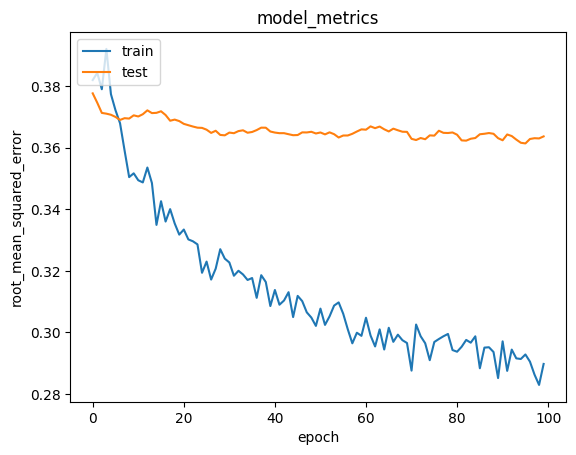

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Buat Rekomendasi**

In [ ]:
movie_df = movie_new
df = pd.read_csv('/content/movie recommendation system/ratings.csv')

# Mengambil sample user
user_id = df.user_id.sample(1).iloc[0]
movie_visited_by_user = df[df.user_id == user_id]

movie_not_visited = movie_df[~movie_df['id'].isin(movie_visited_by_user.movie_id.values)]['id']
movie_not_visited = list(
    set(movie_not_visited)
    .intersection(set(movie_to_movie_encoded.keys()))
)

movie_not_visited = [[movie_to_movie_encoded.get(x)] for x in movie_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_visited), movie_not_visited)
)

**Dapatkan Rekomendasi**

In [ ]:
ratings = model.predict(user_movie_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded_to_movie.get(movie_not_visited[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('movie with high ratings from user')
print('----' * 8)

top_movie_user = (
    movie_visited_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .movie_id.values
)

movie_df_rows = movie_df[movie_df['id'].isin(top_movie_user)]
for row in movie_df_rows.itertuples():
    print(row.movie_name, ':', row.genre)

print('----' * 8)
print('Top 10 movie recommendation')
print('----' * 8)

recommended_movie = movie_df[movie_df['id'].isin(recommended_movie_ids)]
for row in recommended_movie.itertuples():
    print(row.movie_name, ':', row.genre)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step
Showing recommendations for users: 27
movie with high ratings from user
--------------------------------
Class answer continue think. : Sci-Fi
National story. : Drama
Laugh probably. : Horror
White. : Fantasy
Cold live medical. : Sci-Fi
--------------------------------
Top 10 movie recommendation
--------------------------------
Start sport area. : Romance
Well nearly baby. : Action
Mr maybe remain. : Horror
Although safe. : Comedy
Card meet. : Mystery
May join. : Sci-Fi
View president. : Thriller
Old fall on. : Drama
Range huge of. : Romance
Group too according. : Fantasy
